In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [13]:
#!pip show tensorflow

In [2]:
with np.load("mnist.npz") as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']
    #print(type(x_train))
    #print(x_train.shape)




[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


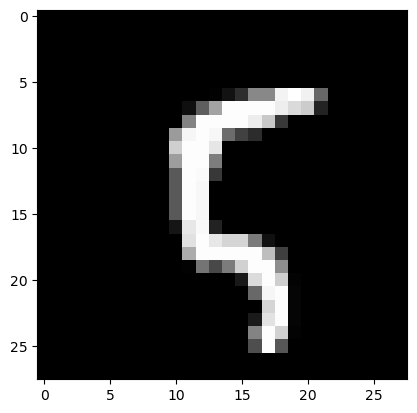

In [52]:
img1=x_train[100]
print(y_train[100])
plt.imshow(img1,cmap="grey")

In [54]:
#normalization
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
#img2=x_train[0]
#plt.imshow(img2)

In [17]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [19]:
y_train[0]
#x_train[100].shape

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [23]:
#Model 1
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#Model 1
model_1=Sequential()
model_1.add(Flatten(input_shape=(28,28)))
model_1.add(Dense(1024,activation='relu'))
model_1.add(Dense(512,activation='relu'))
model_1.add(Dense(256,activation='relu'))
model_1.add(Dense(128,activation='relu'))
model_1.add(Dense(10,activation='softmax'))

In [21]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

In [1]:
#plot_model(model=model,show_shapes=True)

In [31]:
#model compilation
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_1.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
History=model.fit(x_train,y_train,epochs=30,batch_size=30,validation_split=0.2,verbose=1)

Epoch 1/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8306 - loss: 3.4288 - val_accuracy: 0.9269 - val_loss: 0.3022
Epoch 2/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9461 - loss: 0.2049 - val_accuracy: 0.9523 - val_loss: 0.1833
Epoch 3/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9575 - loss: 0.1504 - val_accuracy: 0.9492 - val_loss: 0.2059
Epoch 4/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9635 - loss: 0.1268 - val_accuracy: 0.9621 - val_loss: 0.1365
Epoch 5/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9703 - loss: 0.1053 - val_accuracy: 0.9619 - val_loss: 0.1548
Epoch 6/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9714 - loss: 0.1043 - val_accuracy: 0.9637 - val_loss: 0.1389
Epoch 7/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9766 - loss: 0.0835 - val_accuracy: 0.9671 - val_loss: 0.1355
Epoch 8/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9789 - loss: 0

In [31]:
History1=model_1.fit(x_train,y_train,epochs=50,batch_size=60,validation_split=0.2,verbose=1)

Epoch 1/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9783 - val_loss: 0.1027
Epoch 2/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9776 - val_loss: 0.1032
Epoch 3/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 1.0000 - loss: 9.6059e-04 - val_accuracy: 0.9776 - val_loss: 0.1036
Epoch 4/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 1.0000 - loss: 9.3519e-04 - val_accuracy: 0.9778 - val_loss: 0.1035
Epoch 5/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 1.0000 - loss: 9.4424e-04 - val_accuracy: 0.9779 - val_loss: 0.1041
Epoch 6/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 1.0000 - loss: 9.0678e-04 - val_accuracy: 0.9781 - val_loss: 0.1041
Epoch 7/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 1.0000 - loss: 8.4701e-04 - val_accuracy: 0.9778 - val_loss: 0.1048
Epoch 8/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 1.00

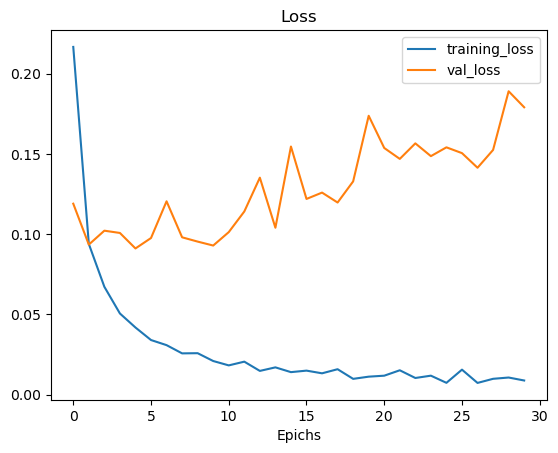

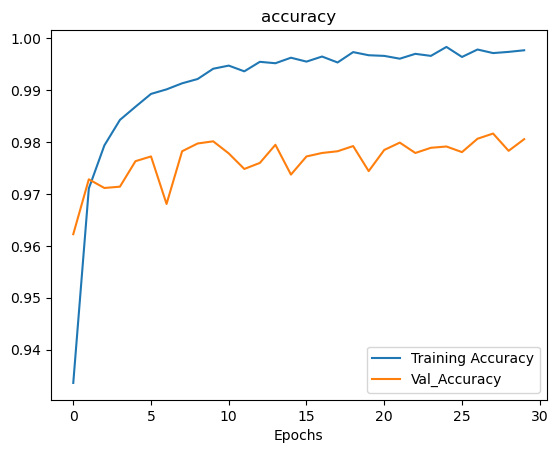

In [53]:
#ploting loss function
def plot_loss_curves(History):
    loss=History.history['loss']
    val_loss=History.history['val_loss']
    accuracy=History.history['accuracy']
    val_accuracy=History.history['val_accuracy']
    epochs=range(len(History.history['loss']))
    #plot loss
    plt.plot(epochs,loss,label='training_loss')
    plt.plot(epochs,val_loss,label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epichs')
    plt.legend()
    #plotting accuracy
    plt.figure()
    plt.plot(epochs,accuracy,label='Training Accuracy')
    plt.plot(epochs,val_accuracy,label='Val_Accuracy')
    plt.title('accuracy')
    plt.xlabel('Epochs')
    plt.legend()
plot_loss_curves(History)


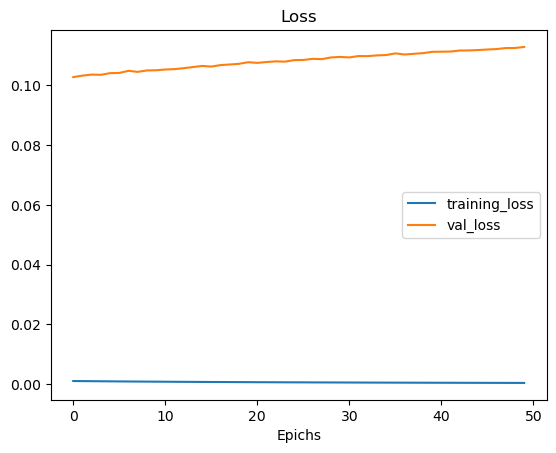

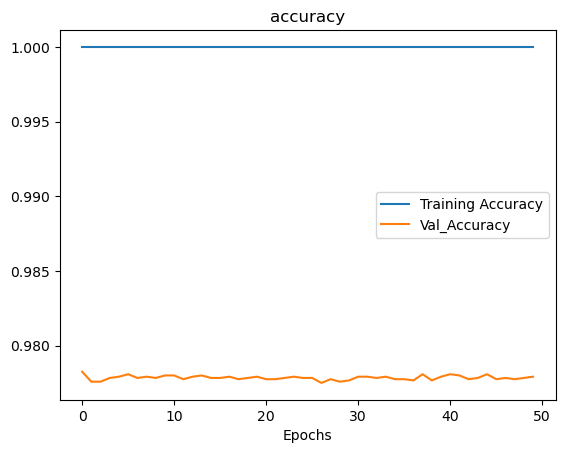

In [55]:
plot_loss_curves(History1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


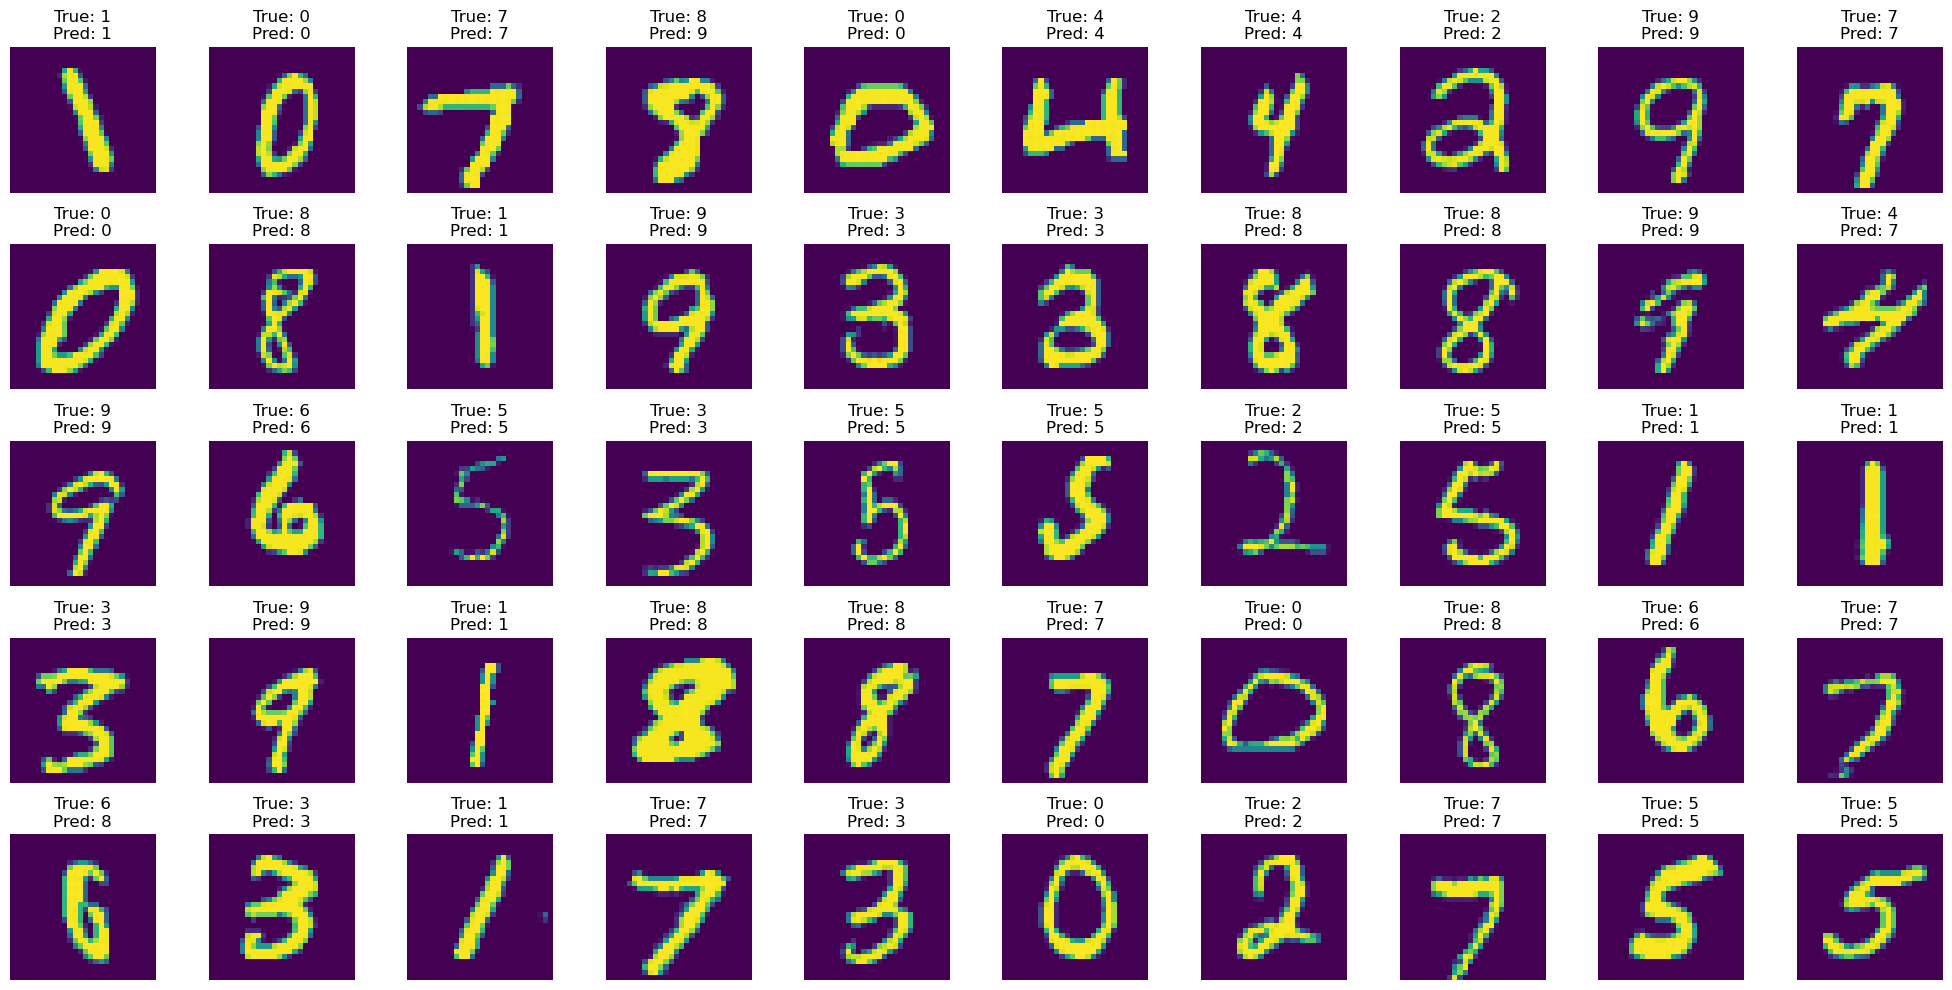

In [71]:
#select 50 random images
num_images=50
random_indices=np.random.choice(x_test.shape[0],num_images,replace=False)
test_images=x_test[random_indices]
true_labels=np.argmax(y_test[random_indices],axis=1)
#predict the labels for these images
predicted_labels=np.argmax(model.predict(test_images),axis=1)
#plot the images with their predicted and true labels
plt.figure(figsize=(20,10))
rows=num_images//10
for i in range(num_images):
    plt.subplot(rows,10,i+1)
    plt.imshow(test_images[i],cmap='viridis')
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


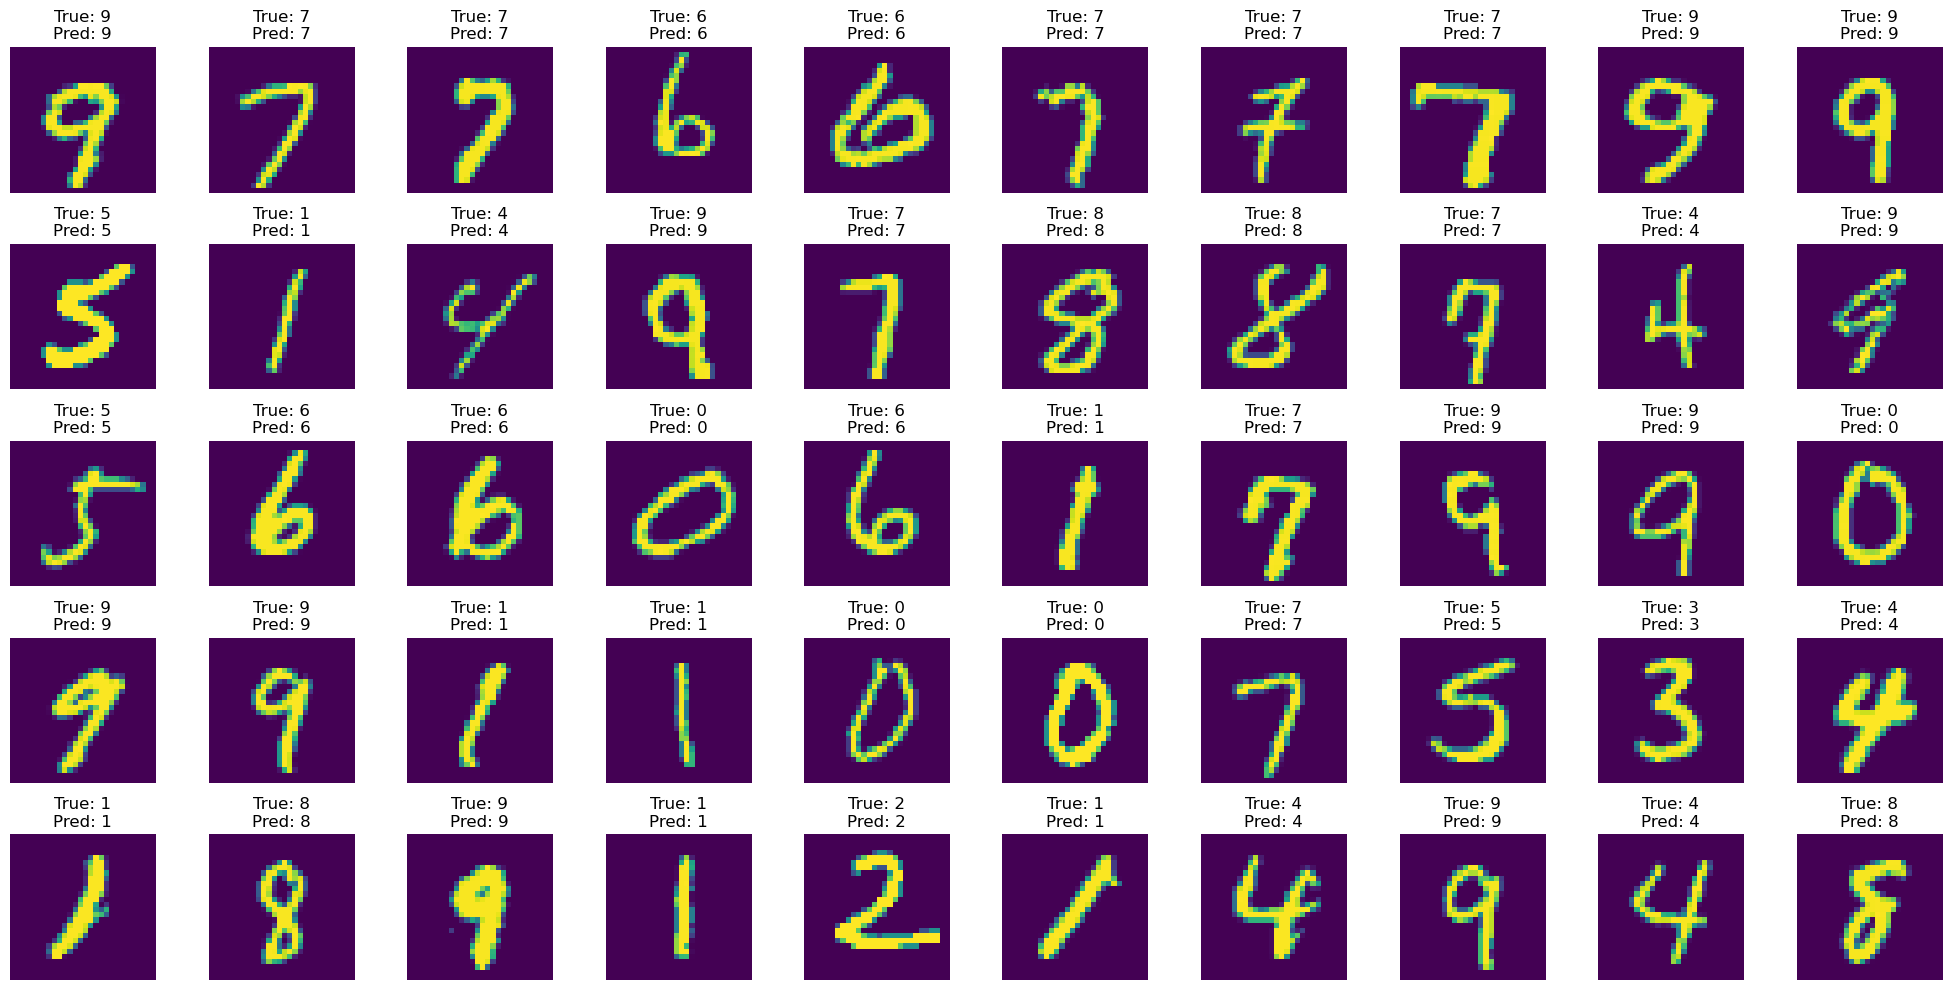

In [73]:
#select 50 random images
num_images=50
random_indices=np.random.choice(x_test.shape[0],num_images,replace=False)
test_images=x_test[random_indices]
true_labels=np.argmax(y_test[random_indices],axis=1)
#predict the labels for these images
predicted_labels=np.argmax(model_1.predict(test_images),axis=1)
#plot the images with their predicted and true labels
plt.figure(figsize=(20,10))
rows=num_images//10
for i in range(num_images):
    plt.subplot(rows,10,i+1)
    plt.imshow(test_images[i],cmap='viridis')
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()